<a href="https://colab.research.google.com/github/Shuayb007/CybersecurityBreach/blob/main/Data_breach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE PROBLEM STATEMENT

In [13]:
from IPython.display import Image
Image(url= 'https://alpinesecurity.com/wp-content/uploads/2020/02/top+5+cybersecurity+breaches.jpg')

I followed a useful guide at : 
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [5]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


# REQUIRED LIBRARIES

In [57]:

# pyLDAavis for topic visualization
!pip install --upgrade pip
!pip install --upgrade jupyter notebook
!pip install pyLDAvis
!pip install gensim==3.8.3



     |████████████████████████████████| 24.2 MB 1.3 MB/s            
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# import key libraries

#Data Manupulation
import pandas as pd 
import numpy as np 
 # for data visualizations

#Plots
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS # for word data visualization
import pyLDAvis

#Data Cleaning and Preparation
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import gensim
import gensim.corpora as corpora #for developing corpus
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel #for checking model cohenrency or performance


In [3]:
!pwd

/content


Exploratory Data Analysis

In [8]:
# load the data
breach_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Breach Chronology.csv')

In [9]:
# dataframe information
breach_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Made Public         9015 non-null   object 
 1   Company                  9015 non-null   object 
 2   City                     5690 non-null   object 
 3   State                    8436 non-null   object 
 4   Type of breach           8926 non-null   object 
 5   Type of organization     9015 non-null   object 
 6   Total Records            9009 non-null   object 
 7   Description of incident  9012 non-null   object 
 8   Information Source       8962 non-null   object 
 9   Source URL               3607 non-null   object 
 10  Year of Breach           9015 non-null   int64  
 11  Latitude                 6541 non-null   float64
 12  Longitude                6541 non-null   float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14             

In [10]:
# Let's view the dataset 
print(breach_df.shape)
print(breach_df.ndim)
print(breach_df.size)
print(breach_df.dtypes)
print(breach_df.memory_usage())

(9015, 16)
2
144240
Date Made Public            object
Company                     object
City                        object
State                       object
Type of breach              object
Type of organization        object
Total Records               object
Description of incident     object
Information Source          object
Source URL                  object
Year of Breach               int64
Latitude                   float64
Longitude                  float64
Unnamed: 13                float64
Unnamed: 14                float64
Unnamed: 15                 object
dtype: object
Index                        128
Date Made Public           72120
Company                    72120
City                       72120
State                      72120
Type of breach             72120
Type of organization       72120
Total Records              72120
Description of incident    72120
Information Source         72120
Source URL                 72120
Year of Breach             72120
Latitude  

In [11]:
breach_df.head

<bound method NDFrame.head of      Date Made Public  ... Unnamed: 15
0            3/3/2006  ...         NaN
1            1/4/2012  ...         NaN
2           2/18/2012  ...         NaN
3           2/22/2012  ...         NaN
4           3/12/2012  ...         NaN
...               ...  ...         ...
9010       11/20/2009  ...         NaN
9011       11/17/2009  ...         NaN
9012       10/30/2009  ...         NaN
9013       10/28/2009  ...         NaN
9014       10/21/2009  ...         NaN

[9015 rows x 16 columns]>

In [12]:
breach_df.tail

<bound method NDFrame.tail of      Date Made Public  ... Unnamed: 15
0            3/3/2006  ...         NaN
1            1/4/2012  ...         NaN
2           2/18/2012  ...         NaN
3           2/22/2012  ...         NaN
4           3/12/2012  ...         NaN
...               ...  ...         ...
9010       11/20/2009  ...         NaN
9011       11/17/2009  ...         NaN
9012       10/30/2009  ...         NaN
9013       10/28/2009  ...         NaN
9014       10/21/2009  ...         NaN

[9015 rows x 16 columns]>

In [14]:
# check for null values
breach_df.isnull().sum()

Date Made Public              0
Company                       0
City                       3325
State                       579
Type of breach               89
Type of organization          0
Total Records                 6
Description of incident       3
Information Source           53
Source URL                 5408
Year of Breach                0
Latitude                   2474
Longitude                  2474
Unnamed: 13                9015
Unnamed: 14                9015
Unnamed: 15                9014
dtype: int64

In [15]:
breach_df2 = breach_df.dropna().reset_index

In [17]:
breach_df.nunique()

Date Made Public           3331
Company                    7669
City                       1550
State                       117
Type of breach                8
Type of organization          8
Total Records              3393
Description of incident    5916
Information Source           18
Source URL                  329
Year of Breach               15
Latitude                   2443
Longitude                  2442
Unnamed: 13                   0
Unnamed: 14                   0
Unnamed: 15                   1
dtype: int64

In [18]:
breach_df3 = breach_df.duplicated()

In [19]:
breach_df['Type of breach'].value_counts()

HACK    2533
DISC    1861
PHYS    1733
PORT    1172
UNKN     704
INSD     606
STAT     249
CARD      68
Name: Type of breach, dtype: int64

In [20]:
breach_df.describe()

,Year of Breach,Latitude,Longitude,Unnamed: 13,Unnamed: 14
count,9015.000000,6541.000000,6541.000000,0.0,0.0
mean,2012.664781,34.715053,-84.329003,NaN,NaN
std,3.604705,11.668258,31.603515,NaN,NaN
min,2005.000000,-34.603684,-159.371111,NaN,NaN
25%,2010.000000,33.711829,-104.821363,NaN,NaN
50%,2013.000000,38.502469,-84.387982,NaN,NaN
75%,2016.000000,40.760537,-74.890999,NaN,NaN
max,2019.000000,64.837778,139.691706,NaN,NaN


In [24]:
!pip install sweetviz
import sweetviz
report = sweetviz.analyze(breach_df)
report.show_html()

     |████████████████████████████████| 15.1 MB 4.2 MB/s            


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.7/dist-packages/sweetviz/series_analyzer.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()
/usr/local/lib/python3.7/dist-packages/sweetviz/series_analyzer.py:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  value_counts_without_nan = pd.Series()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


/usr/local/lib/python3.7/dist-packages/sweetviz/templates/feature_detail_cat.html:250: DeprecationWarning: 'soft_unicode' has been renamed to 'soft_str'. The old name will be removed in MarkupSafe 2.1.
/usr/local/lib/python3.7/dist-packages/sweetviz/templates/feature_detail_cat.html:250: DeprecationWarning: 'soft_unicode' has been renamed to 'soft_str'. The old name will be removed in MarkupSafe 2.1.
/usr/local/lib/python3.7/dist-packages/sweetviz/templates/feature_detail_cat.html:250: DeprecationWarning: 'soft_unicode' has been renamed to 'soft_str'. The old name will be removed in MarkupSafe 2.1.
/usr/local/lib/python3.7/dist-packages/sweetviz/templates/feature_detail_cat.html:250: DeprecationWarning: 'soft_unicode' has been renamed to 'soft_str'. The old name will be removed in MarkupSafe 2.1.
/usr/local/lib/python3.7/dist-packages/sweetviz/templates/feature_detail_cat.html:250: DeprecationWarning: 'soft_unicode' has been renamed to 'soft_str'. The old name will be removed in Markup

# PERFORMING DATA CLEANING


# creating a dictionary with column name and data type
data_types_dict = {'Description of incident': str}

breach_df = breach_df.astype(data_types_dict)

breach_df.dtypes

In [ ]:
breach_df['Description of incident'][2]

In [27]:
# Removing punctuations in string using regex with sub to search and replace patterns in the string
#Removing punctuations, alphanumeric, and digits from the column we're interested in

data_types_dict = {'description': str}

breach_df = breach_df.astype(data_types_dict)
  

def remov_punc(text):
    #removing punctuations and unicode characters
    text = re.sub(r'[?!.;:,#@-]', '', text)
    
    text = re.sub(r'[^\w\s\d][a-z]', '', text)
    
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    #converting all words to lowercase
    text = text.lower()
    
    return text


In [28]:
# Let's remove punctuations from our dataset using regular expressions
breach_df['description'] = breach_df['description'].apply(remov_punc)

In [29]:
breach_df['description'][2]

"bdo was contracted by rubio to perform financial auditing services a bdo employee accidentally removed one or more cdroms from the office the cdrom or cdroms contained a list of rubio workers' compensation claimants and a list of people who owned equity shares in rubio restaurants inc the cdrom or cdroms appear to have been stolen from the bdo employee vehicle the workers' compensation information contained names claim numbers medical status and date of loss the medical status information included the employees' claim for injuries or illnesses no social security numbers were involved the partial equity roll list contained names and social security numbers"

# TASK #4: PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [ ]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

In [33]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https', 'and', 'the', 'have', 'been', 'for', 'to', 'were', 'by', 'a', 'in', 'an','at', 'may''or'])


In [34]:
# Remove stopwords and remove short words (less than 2 characters)
def remov_stop(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [35]:
# apply pre-processing to the text column
breach_df['description'] = breach_df['description'].apply(remov_stop)
# join the words into a string
breach_df['description'] = breach_df['description'].apply(lambda x: " ".join(x))

In [36]:
breach_df['description'][2]

'bdo contracted rubio perform financial auditing services bdo employee accidentally removed one cdroms office cdrom cdroms contained list rubio workers compensation claimants list people owned equity shares rubio restaurants inc cdrom cdroms appear stolen bdo employee vehicle workers compensation information contained names claim numbers medical status date loss medical status information included employees claim injuries illnesses social security numbers involved partial equity roll list contained names social security numbers'

# TASK #6: VISUALIZE CLEANED DATASETS AND PREPROCESS DATA

In [ ]:
breach_df['Data']

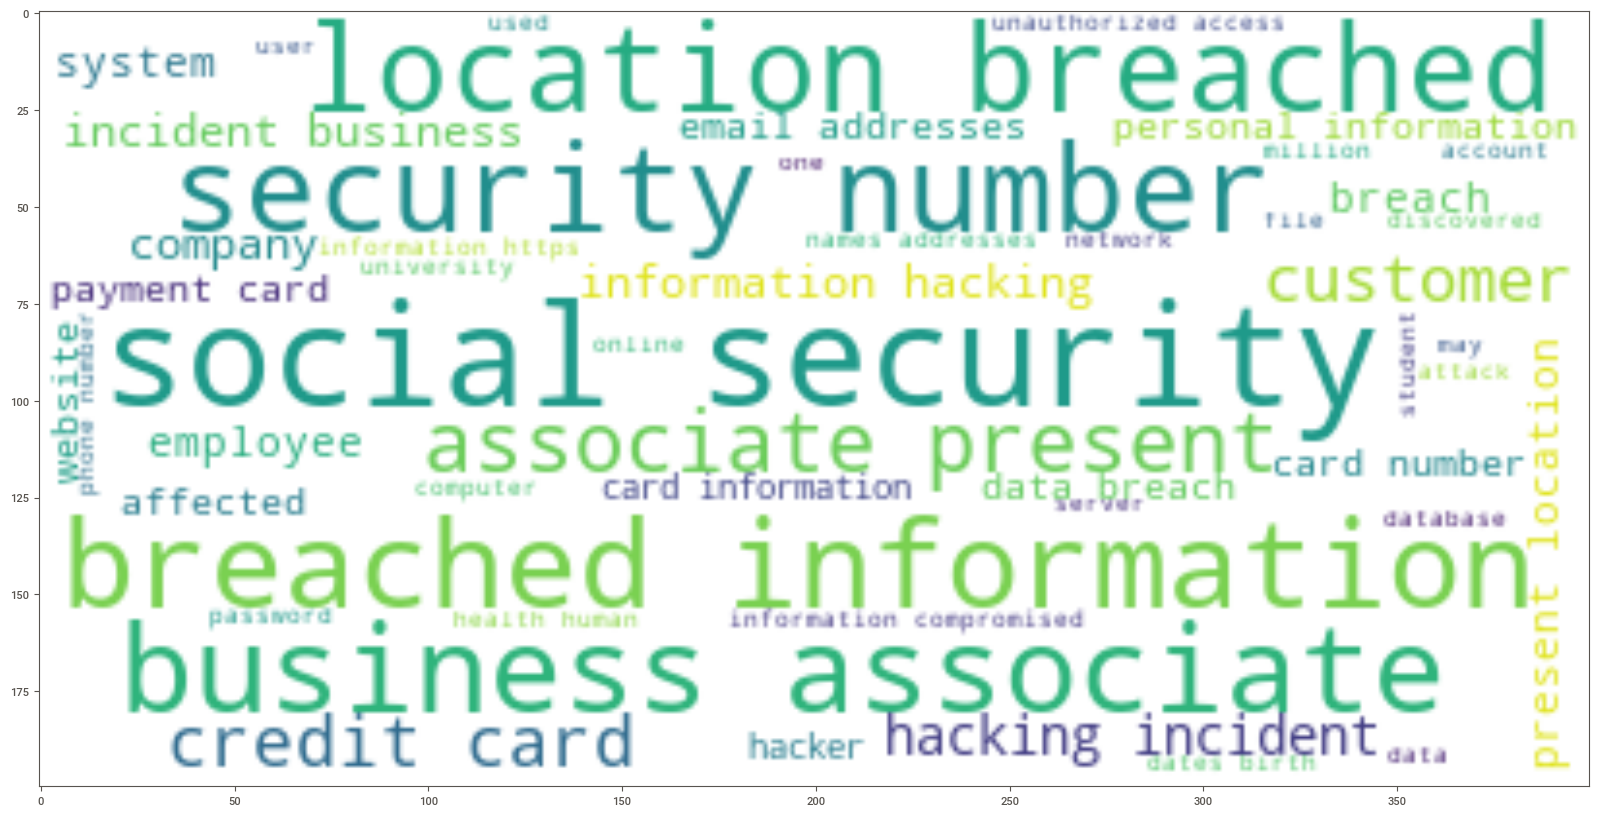

In [40]:
#vizualising incident description when the type of breach is a Hack
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 50 , background_color= "White").generate(" ".join(breach_df[breach_df['breach_type'] == 'HACK']['description']))
plt.imshow(wc, interpolation = 'bilinear');


In [ ]:
nltk.download('punkt')

In [41]:
#prepocessing and tokenization
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(breach_df['description']))

print(data_words[:1])

[['company', 'website', 'breached', 'sometime', 'around', 'february', 'hacker', 'attempt', 'gain', 'access', 'certain', 'customers', 'private', 'information', 'social', 'security', 'numbers', 'names', 'addresses', 'bank', 'account', 'names', 'bank', 'account', 'numbers', 'may', 'compromised', 'least', 'individuals', 'affected']]


In [42]:
#bigrams and trigrams are words that usually come in pairs and thrice, but referring to the same things

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['company', 'website', 'breached', 'sometime_around', 'february', 'hacker', 'attempt', 'gain', 'access', 'certain', 'customers', 'private', 'information', 'social', 'security', 'numbers', 'names', 'addresses', 'bank', 'account', 'names', 'bank', 'account', 'numbers', 'may', 'compromised', 'least', 'individuals', 'affected']


In [45]:
#function definition for bigrams, triagrams and lemmatization. 

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [46]:
#lematization of the words, which simply means to break down some words into their root words, eg walking to walk. 

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:3])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

[['company', 'website', 'breach', 'sometime', 'hacker', 'attempt', 'gain', 'access', 'certain', 'customer', 'private', 'information', 'social', 'security', 'number', 'address', 'account', 'account', 'number', 'may', 'compromised', 'least', 'individual', 'affect'], ['theft', 'laptop', 'park', 'result', 'loss', 'personal', 'information', 'information', 'use', 'preparation', 'merger', 'fire', 'current', 'former', 'account', 'holder', 'name', 'social', 'security', 'number', 'date', 'birth', 'address', 'account', 'information'], ['contract', 'rubio', 'perform', 'financial', 'auditing', 'service', 'bdo', 'employee', 'accidentally', 'remove', 'cdrom', 'office', 'cdrom', 'cdrom', 'contain', 'list', 'rubio', 'worker', 'compensation', 'claimant', 'list', 'people', 'own', 'equity', 'share', 'rubio', 'cdrom', 'appear', 'steal', 'employee', 'vehicle', 'worker', 'compensation', 'information', 'contain', 'name', 'claim', 'number', 'medical', 'status', 'loss', 'medical', 'status', 'information', 'incl

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

# TASK #7: DATA PREPROCESSING BY CORPUS AND DICTIONARY CREATION

In [47]:
# A dictionary and corpus are input parameters in the LDA algorithm we have selected for this model

# Creating a Dictionary
id2word = corpora.Dictionary(data_lemmatized)

id2word[3]

'affect'

In [48]:
#Gensim creates a unique id for each word in the document and also includes the frequency of occurence

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:3])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(1, 2), (2, 1), (13, 3), (16, 1), (18, 1), (19, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(13, 2), (16, 3), (18, 2), (19, 2), (29, 1), (31, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 4), (43, 2), (44, 1), (45, 2), (46, 3), (47, 1), (48, 3), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 3), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 3), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2)]]


In [49]:

# to see the words and frequency of occurrence
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]


[[('access', 1),
  ('account', 2),
  ('address', 1),
  ('affect', 1),
  ('attempt', 1),
  ('breach', 1),
  ('certain', 1),
  ('company', 1),
  ('compromised', 1),
  ('customer', 1),
  ('gain', 1),
  ('hacker', 1),
  ('individual', 1),
  ('information', 1),
  ('least', 1),
  ('may', 1),
  ('number', 2),
  ('private', 1),
  ('security', 1),
  ('social', 1),
  ('sometime', 1),
  ('website', 1)],
 [('account', 2),
  ('address', 1),
  ('information', 3),
  ('number', 1),
  ('security', 1),
  ('social', 1),
  ('birth', 1),
  ('current', 1),
  ('date', 1),
  ('fire', 1),
  ('former', 1),
  ('holder', 1),
  ('laptop', 1),
  ('loss', 1),
  ('merger', 1),
  ('name', 1),
  ('park', 1),
  ('personal', 1),
  ('preparation', 1),
  ('result', 1),
  ('theft', 1),
  ('use', 1)],
 [('information', 2),
  ('number', 3),
  ('security', 2),
  ('social', 2),
  ('loss', 1),
  ('name', 2),
  ('accidentally', 1),
  ('appear', 1),
  ('auditing', 1),
  ('bdo', 1),
  ('cdrom', 4),
  ('claim', 2),
  ('claimant', 1)

In [50]:
len(corpus)

9015

# TASK #7: ALGORITHM SELECTION AND MODEL TESTING

In [ ]:
#I will be using the Latent Dirichlet Allocation (LDA) from Gensim package along with the Mallet’s implementation (via Gensim). 
#Mallet has an efficient implementation of the LDA. It is known to run faster and gives better topics segregation.

In [ ]:
#We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.
#Apart from that, alpha and beta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.
#chunksize is the number of documents to be used in each training chunk. 
#update_every determines how often the model parameters should be updated 
#passes is the total number of training passes.

# Building the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [52]:
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.093*"information" + 0.069*"patient" + 0.038*"record" + 0.028*"medical" + '
  '0.020*"date" + 0.020*"health" + 0.019*"number" + 0.014*"office" + '
  '0.013*"birth" + 0.012*"result"'),
 (1,
  '0.028*"company" + 0.025*"system" + 0.023*"datum" + 0.018*"individual" + '
  '0.017*"compromise" + 0.014*"user" + 0.012*"investigation" + 0.010*"accord" '
  '+ 0.010*"could" + 0.010*"affect"'),
 (2,
  '0.180*"loss" + 0.078*"employee" + 0.038*"steal" + 0.026*"laptop" + '
  '0.021*"former" + 0.016*"contain" + 0.009*"current" + 0.009*"device" + '
  '0.008*"home" + 0.008*"year"'),
 (3,
  '0.174*"breach" + 0.171*"location" + 0.171*"associate" + 0.170*"present" + '
  '0.160*"information" + 0.037*"unauthorized" + 0.034*"access" + 0.021*"hack" '
  '+ 0.004*"card" + 0.003*"credit"'),
 (4,
  '0.514*"business" + 0.279*"theft" + 0.018*"disposal" + 0.018*"improper" + '
  '0.004*"identity" + 0.002*"fraud" + 0.001*"offer" + 0.001*"victim" + '
  '0.001*"federal" + 0.001*"obtain"'),
 (5,
  '0.131*"disclosu

In [53]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -6.90644664553905

Coherence Score:  0.4792998721838401


In [54]:
# Visualize the topics
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.038419  0.146833       1        1  36.633619
3     -0.415114 -0.051810       2        1  21.444272
0      0.011350  0.124313       3        1  13.319799
1      0.165211  0.090513       4        1  12.172253
4      0.115931 -0.391660       5        1   8.903226
2      0.161041  0.081811       6        1   7.526832, topic_info=           Term          Freq         Total Category  logprob  loglift
868    business  10369.000000  10369.000000  Default  30.0000  30.0000
36        theft   5635.000000   5635.000000  Default  29.0000  29.0000
5        breach   8497.000000   8497.000000  Default  28.0000  28.0000
687    location   8282.000000   8282.000000  Default  27.0000  27.0000
178   associate   8278.000000   8278.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
114    computer    124.764766    734.439007   Topic6  -4.9165   0.8140
19       social    117.671414   1476.303530   Topic6  -4.9750   0.0573
509  fraudulent     65.745850    226.938880   Topic6  -5.5571   1.3478
33     personal     97.666961    990.292660   Topic6  -5.1614   0.2703
14        least     55.183086    166.927697   Topic6  -5.7323   1.4798

[277 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.512826  access
0         2  0.486557  access
0         3  0.000292  access
0         4  0.000292  access
0         6  0.000292  access
...     ...       ...     ...
70        6  0.948770  worker
112       1  0.003171    year
112       3  0.003171    year
112       4  0.586625    year
112       6  0.405881    year

[986 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 2, 5, 3])

In [66]:
#The pacakage was downloaded from http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/content/drive/MyDrive/Colab Notebooks/mallet-2.0.8/bin/mallet.bat' 
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:494: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


CalledProcessError: ignored

In [62]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

NameError: ignored

In [ ]:
# Visualize the Mallet topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamallet, corpus, id2word)
vis